# Word Prediction using Recurrent Neural Networks (RNNs)
## Experiment 2016-12-23

Loop over training size, plot learning curves. 

### Table of Contents

1. Prepare Data
2. Explore Data
3. Analyze Models
4. Generate Text

## Imports

In [17]:
# import python modules
from __future__ import print_function, division
import os.path
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import tokenize

In [18]:
# import wp modules (can be slow)
import sys; sys.path.append('../../src')
print('importing wp (and nltk)...')
import wp
print('done')

importing wp (and nltk)...
done


In [19]:
# reload wp modules in case changed (for development purposes)
reload(wp)
reload(wp.data)
reload(wp.util)
reload(wp.model)
reload(wp.ngram)
reload(wp.rnn)
reload(wp.analyze)

<module 'wp.analyze' from '../../src\wp\analyze.pyc'>

## Initialize

In [20]:
random.seed(0)

#nvocab = 100

## 1. Prepare Data

Merge raw text files, convert to plain strings, split into train, validate, and test sets.

In [21]:
# get wrapper around all data and tokenization
data = wp.data.Data()

Merge the raw data files into one and remove non-ascii characters (nltk complains otherwise).

In [22]:
data.merge()

The raw files have already been merged.


Split the merged file by sentences into train, validate, and test sets.

In [23]:
data.split()

The merged file has already been split.


Find most used vocabulary words to keep RNN from getting too expensive.

In [24]:
#data.find_vocabulary(nvocab)

## 2. Explore Data

### Show some samples of the text

In [25]:
s_merged = data.text('merged')
nsamples = 4
nchars = len(s_merged)
nskip = int(nchars / nsamples)
for i in range(nsamples):
    s = s_merged[i*nskip:i*nskip+200]
    s = s.replace('\n', ' ').strip()
    print(s)
    print()

The Project Gutenberg EBook of Les Misrables, by Victor Hugo  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-us

ng his loss of sleep by an hour at the swimming-school, he mounted rapidly to his chamber, took merely time enough to throw off his travelling-coat, and the black ribbon which he wore round his neck,

than Javert. Javert, after his unlooked-for escape from the barricade, had betaken himself to the prefecture of police, had rendered a verbal account to the Prefect in person in a brief audience, had

hire, where, some six months before, he had been left an orphan. Now, owing to the generous offer of his elderly cousin, Mr Abney, he had come to live at Aswarby. The offer was unexpected, because all



### Show some text split into sentences

This shows how the text was split up into the train, validate, and test sets.

In [26]:
# we'll just look at the first 50k characters, because parsing sentences is slow
sentences = data.sentences('merged', 50000)
random.seed(0)
samples = random.sample(sentences, 5)
print('\n\n'.join(samples))

To villages where he found no schoolmaster, he quoted once more the people of Queyras: "Do you know how they manage?"

Those who had and those who lacked knocked at M. Myriel's door,--the latter in search of the alms which the former came to deposit.

.

.

.


### Show the text split into tokens

Note that punctuation marks are treated as separate tokens.

In [33]:
tokens = data.tokens('merged', 50000)
print('ntokens',len(tokens))
print(tokens[-50:])

ntokens 10556
['he', 'saw', 'everyone', 'exclaiming', 'very', 'loudly', ',', 'and', 'growing', 'angry', 'very', 'quickly', ',', '``', 'Oh', '!', 'END', 'oh', '!', "''", 'END', 'he', 'said', ',', 'with', 'a', 'smile', ';', '``', 'to', 'all', 'appearance', ',', 'this', 'is', 'a', 'great', 'crime', 'which', 'all', 'the', 'world', 'commits', '.', 'END', 'These', 'are', 'hypocrisies', 'w', 'END']


## 3. Analyze Models

Train models on the training tokens and test them on the test tokens.

In [28]:
# define models to test
modelspecs = [
    [wp.ngram.NgramModel, {'n':1}],
    [wp.ngram.NgramModel, {'n':2}],
    [wp.ngram.NgramModel, {'n':3}],
    [wp.ngram.NgramModel, {'n':4}],
#    [wp.rnn.RnnModel, {'nvocab':1000,'nhidden':10}],
]

In [41]:
# train models on different amounts of training data 
# and save results to a table.

modelfolder = '../../data/models'
#. should be ntraining_tokens
nchars_list = (1000,10000,100000,1000000)#,6000000)
rows = []
npredictions_max = 1000
k = 3 # predict top k tokens
for nchars in nchars_list:
    print('ntraining_chars', nchars)
    # moved train/load/test code to analyze.py to keep notebook simpler
    models = wp.analyze.init_models(modelspecs, modelfolder, data, nchars) # load/train models
    results = wp.analyze.test_models(models, data, npredictions_max, k, nchars) # test models
    print()
    row = [nchars] + results
    rows.append(row)


ntraining_chars 1000
create model object
get complete stream of training tokens, nchars=1000
train model
get ngrams, n=1
add ngrams to model
save model
create model object
train model
get ngrams, n=2
add ngrams to model
save model
create model object
train model
get ngrams, n=3
add ngrams to model
save model
create model object
train model
get ngrams, n=4
add ngrams to model
save model
get complete stream of test tokens, nchars=1000
group tokens into tuples, n=1
n-gram (n=1): accuracy = nright/total = 44/185 = 0.237838
group tokens into tuples, n=2
n-gram (n=2): accuracy = nright/total = 23/184 = 0.125000
group tokens into tuples, n=3
n-gram (n=3): accuracy = nright/total = 12/183 = 0.065574
group tokens into tuples, n=4
n-gram (n=4): accuracy = nright/total = 1/182 = 0.005495

ntraining_chars 10000
create model object
get complete stream of training tokens, nchars=10000
train model
get ngrams, n=1
add ngrams to model
save model
create model object
train model
get ngrams, n=2
add ngram

In [42]:
cols = ['nchars'] + [model.name for model in models]
df = pd.DataFrame(rows, columns=cols)
df

,nchars,n-gram (n=1),n-gram (n=2),n-gram (n=3),n-gram (n=4)
0,1000,0.237838,0.125000,0.065574,0.005495
1,10000,0.173826,0.196803,0.105894,0.032967
2,100000,0.091908,0.282717,0.174825,0.075924
3,1000000,0.073926,0.388611,0.399600,0.327672


In [43]:
dft = df.transpose()
dft.columns = nchars_list
dft2 = dft.drop('nchars',axis=0)
dft2

,1000,10000,100000,1000000
n-gram (n=1),0.237838,0.173826,0.091908,0.073926
n-gram (n=2),0.125000,0.196803,0.282717,0.388611
n-gram (n=3),0.065574,0.105894,0.174825,0.399600
n-gram (n=4),0.005495,0.032967,0.075924,0.327672


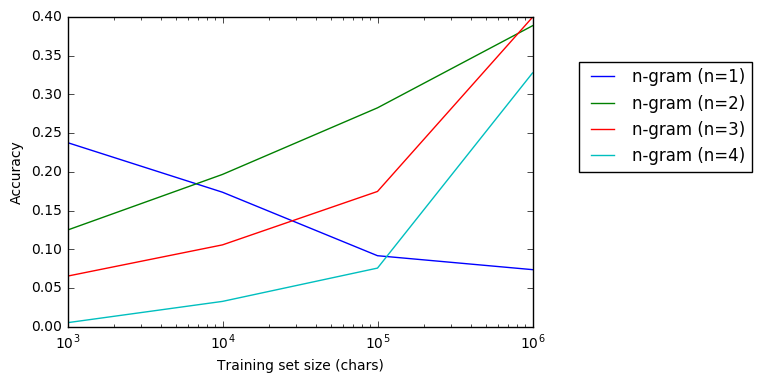

In [44]:
plt.plot(dft2.columns, dft2.ix[0])
plt.plot(dft2.columns, dft2.ix[1])
plt.plot(dft2.columns, dft2.ix[2])
plt.plot(dft2.columns, dft2.ix[3])
#plt.legend(loc='best')
plt.legend(loc=(1.1,0.5))
plt.xscale('log')
plt.xlabel('Training set size (chars)')
plt.ylabel('Accuracy')
plt.show()

## 4. Generate Text

In [45]:
nsentences = 5
for model in models:
    print(model.name)
    for seed in range(nsentences):
        random.seed(seed)
        tokens = model.generate()
        if tokens:
            s = ' '.join(tokens)
            print(s)
            print()
    print()

n-gram (n=1)
and laid a ink he -- hammers the hands , of he 1817 over in edition of who END

I and temptation become BE conflict man name 's . END

moss are . '' END

this , There is in had They END

this `` you with had -- governed END


n-gram (n=2)
He showed no water , and uneasy flight . END

`` Are you mean to his curacy for them children who said of whose whole of the less a glance into a fault , was crowned and the millionaire or trouble for what was still shouts . END

How pay me , Cteaux . END

One day , with indignation : _M . END

One Sunday , the Lame . '' END


n-gram (n=3)
Look at the sun ; to rush towards a glory . END

Thence it results that , if he entertained all these English bullets enter my bowels ! '' END

Yesterday he saw Fantine 's dictation , and three hundred light cavalry on the following sermon in the matter , and to himself , peaceful , adoring , comparing the serenity of the resolution which I saved in 1793 . END

Prejudices are the effects of the battle ;